# QAC Analysis
by Deep Datta, Giri Ganta, Mihir Gathani, Patrick Kelleher, William Swain

## Question: Do Vessels Fish Around Shipwrecks More Often Than Not?

- The United States has a long history of shipwrecks from fishing vessels to actual tankers. Many vessels wreck each year and some are not listed down. The question is whether vessels fish around shipwrecks more often than not because of the theory that fish like the cover of obstructions and big objects from our knowledge of fresh water fishing because tend to stay around structures for safety.
  
- The US Office of Coast/ NOAA have a dataset at: https://nauticalcharts.noaa.gov/data/wrecks-and-obstructions.html
- We get some of our other data as well from the Global Fishing Watch website: https://globalfishingwatch.org/
- We also get some of our data from the General Bathymetric Chart of the Oceans (GEBCO) for our depth values at: https://download.gebco.net/
  
- Overview of our method:
    1. Get the data from the websites above.
    2. Merge and clean the datasets into one major method
    3. Next visualize the data to see if there is a correlation between the shipwrecks and the fishing vessels. 
    4. Finally, check to see correlation in dataset to answer question above

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

## Analysis 

This is the fishing vessels data we cleaned and merged into this new dataset. We are using the bounding box of between 23.5N to 50N and 100W to 60W because that includes the east coast of the US and Gulf of Mexico.


In [19]:
curr_date = dt.strptime("2020-01-02", "%Y-%m-%d")
end_date = dt.strptime("2020-12-31", "%Y-%m-%d")
vessels_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
# Remove where fishing hours is 0 because that means the vessel wasn't fishing at that location
vessels_df = vessels_df[vessels_df.fishing_hours != 0]
# Only include vessels in the region between 23.5N and 50N and 100W and 60W
vessels_df = vessels_df[vessels_df.cell_ll_lat >= 23.5]
vessels_df = vessels_df[vessels_df.cell_ll_lat <= 50]
vessels_df = vessels_df[vessels_df.cell_ll_lon <= -60]
vessels_df = vessels_df[vessels_df.cell_ll_lon >= -100]
curr_date = curr_date + relativedelta(days=1)
while curr_date < end_date:
    temp_df = pd.read_csv(f'./mmsi-daily-csvs-10-v2-2020/{curr_date:%Y-%m-%d}.csv')
    # Remove where fishing hours is 0 because that means the vessel wasn't fishing at that location
    temp_df = temp_df[temp_df.fishing_hours != 0]
    # Only include vessels in the region between 23.5N and 50N and 100W and 60W
    temp_df = temp_df[temp_df.cell_ll_lat >= 23.5]
    temp_df = temp_df[temp_df.cell_ll_lat <= 50]
    temp_df = temp_df[temp_df.cell_ll_lon <= -60]
    temp_df = temp_df[temp_df.cell_ll_lon >= -100]
    vessels_df = pd.concat([vessels_df, temp_df])
    curr_date = curr_date + relativedelta(days=1)
    print(f'{curr_date:%Y-%m-%d}', end='\r')

vessels_df

,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours
6462,2020-01-02,25.0,-82.5,367680570,14.1386,13.1827
6463,2020-01-02,25.0,-82.6,367680570,2.0897,2.0897
6899,2020-01-02,27.0,-83.0,367532970,1.7083,1.7083
6965,2020-01-02,28.0,-94.1,367743330,5.0741,4.8241
7040,2020-01-02,29.0,-89.9,366861460,13.6988,10.4994
...,...,...,...,...,...,...
87065,2020-12-30,31.8,-78.8,367719840,1.7255,0.2591
87659,2020-12-30,41.6,-68.6,368161410,0.2605,0.2605
87999,2020-12-30,43.6,-69.9,368016910,4.2641,2.1730
88000,2020-12-30,43.6,-69.2,368017040,7.3930,6.3683


We then cleaned the AWOIS wrecks file to have the same bounding box as our vessels data.

In [20]:
wrecks_df = pd.read_excel("AWOIS_Wrecks.xlsx")
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]>23.5]
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]<50]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]<-60]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]>-100]
wrecks_df

c:\Users\willi\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,RECRD,VESSLTERMS,FEATURE_TYPE,LATDEC,LONDEC,GP_QUALITY,DEPTH,SOUNDING_TYPE,YEARSUNK,HISTORY
0,14620,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",42.143528,-80.114556,High,18.0,Feet and tenths,NaN,F00542: S-W904-NRT4-07; Office review indica...
1,14292,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",41.498284,-81.759593,High,26.0,Feet and tenths,NaN,H11689/2007-- S-w920-NRT4-07; Dangerous sub...
2,14296,ALGERIA,"Wreck - Submerged, dangerous to surface naviga...",41.520448,-81.716076,High,32.0,Feet and tenths,NaN,H11689/2007-- S-W920-NRT4-07; A large subme...
3,14298,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",41.512713,-81.709879,High,22.0,Feet and tenths,NaN,H11689/2007-- S-W920-NRT4-07; A submerged w...
4,14207,UNKNOWN,"Wreck - Submerged, dangerous to surface naviga...",42.993389,-82.426583,High,34.0,Feet and tenths,NaN,CL 1883/1999-- The Canadian Hydrographic Se...
...,...,...,...,...,...,...,...,...,...,...
6217,2886,NORHTEASTERN,Not Charted,35.091842,-75.557928,Poor,0.0,NaN,NaN,SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED
6218,2887,ARRAYO,Not Charted,34.983500,-76.051289,Poor,0.0,NaN,NaN,SURVEY REQUIREMENTS_x000D_\nNOT DETERMINED
6219,2889,NORDAL,Not Charted,34.691842,-75.584597,Poor,0.0,NaN,NaN,_x000D_\nDESCRIPTION ...
6220,14917,USS VIRGINA,"Wreck - Submerged, nondangerous",35.019290,-75.285944,Med,103.0,Feet and tenths,1923.0,American Battleship of WWI vintage sunk during...


For our ocean depth dataset, we made it so any terrain that had a positive value (i.e. above sea level) to have a value of 500. This is because the dataset included elevation above sea levels, so by making the elevation values the same and far enough away from 0, we get a much cleaner looking plot, visually. 

In [21]:
# This is the information given to us with the data
# ncols        9600
# nrows        6360
# xllcorner    -100.000000000000
# yllcorner    23.500000000000
# cellsize     0.004166666667
# NODATA_value -32767
cols = [-100 + i*0.004166666667 for i in range(9600)]
cols.insert(0, 'throwaway')
rows = [50 - i*0.004166666667 for i in range(6360)]
depth_df = pd.read_csv("./GEBCO_06_Nov_2022_e0f252343eb4/gebco_2022_n50.0_s23.5_w-100.0_e-60.0.asc", delimiter=" ", names=cols)
depth_df.index = rows
depth_df = depth_df.drop(columns="throwaway")
depth_df[depth_df > 0] = 500
depth_df

,-100.000000,-99.995833,-99.991667,-99.987500,-99.983333,-99.979167,-99.975000,-99.970833,-99.966667,-99.962500,...,-60.041667,-60.037500,-60.033333,-60.029167,-60.025000,-60.020833,-60.016667,-60.012500,-60.008333,-60.004167
50.000000,500,500,500,500,500,500,500,500,500,500,...,-149,-147,-133,-133,-133,-137,-131,-131,-134,-135
49.995833,500,500,500,500,500,500,500,500,500,500,...,-146,-145,-135,-127,-127,-131,-131,-131,-132,-132
49.991667,500,500,500,500,500,500,500,500,500,500,...,-149,-144,-136,-130,-130,-129,-129,-129,-127,-126
49.987500,500,500,500,500,500,500,500,500,500,500,...,-147,-143,-137,-133,-133,-131,-127,-127,-125,-124
49.983333,500,500,500,500,500,500,500,500,500,500,...,-141,-141,-138,-134,-134,-131,-129,-129,-128,-128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.520833,500,500,500,500,500,500,500,500,500,500,...,-5938,-5936,-5935,-5933,-5932,-5932,-5931,-5930,-5932,-5934
23.516667,500,500,500,500,500,500,500,500,500,500,...,-5938,-5937,-5935,-5934,-5933,-5932,-5932,-5931,-5933,-5934
23.512500,500,500,500,500,500,500,500,500,500,500,...,-5938,-5938,-5936,-5935,-5935,-5934,-5933,-5933,-5934,-5936
23.508333,500,500,500,500,500,500,500,500,500,500,...,-5939,-5939,-5938,-5937,-5936,-5936,-5935,-5935,-5936,-5937


With data gathering and cleaning completed, we overlay the fishing boat data and the shipwreck data to see if there is any correlation.

Text(0.5, 0, 'Longitude')

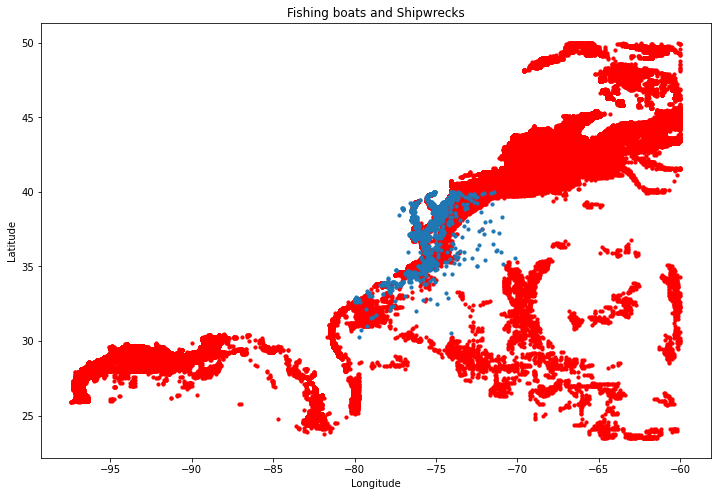

In [36]:
axes = vessels_df.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False)
axes= wrecks_df.plot.scatter(x='LONDEC',y='LATDEC',vmin=0,vmax=6,s=10,figsize=(12,8), alpha=1,sharex=False,ax=axes,title="Fishing Boats and Shipwrecks")
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

The data looks promising from a distance, with a heavy presence of shipwrecks and fishing boats lining the coast.

Text(0.5, 0, 'Longitude')

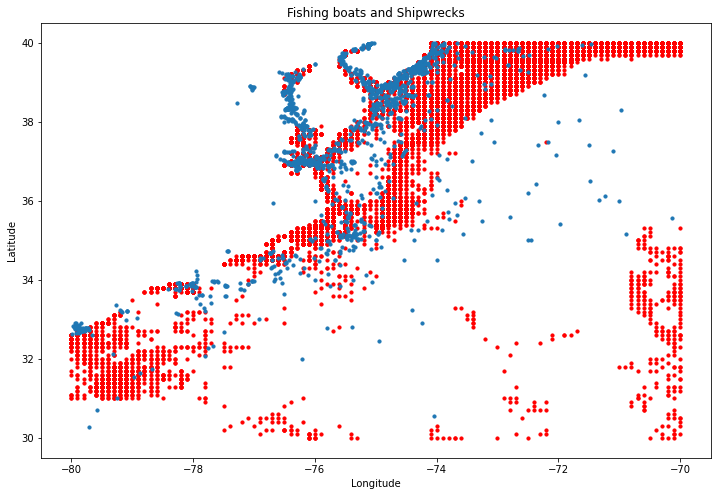

In [37]:
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]>30]
wrecks_df = wrecks_df.loc[wrecks_df["LATDEC"]<40]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]<-70]
wrecks_df = wrecks_df.loc[wrecks_df["LONDEC"]>-80]

vessels_overlay = vessels_df.copy()
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat >= 30]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lat <= 40]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon <= -70]
vessels_overlay = vessels_overlay[vessels_overlay.cell_ll_lon >= -80]

axes = vessels_overlay.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False)
axes= wrecks_df.plot.scatter(x='LONDEC',y='LATDEC',vmin=0,vmax=6,s=10,figsize=(12,8), alpha=1,sharex=False,ax=axes,title="Fishing Boats and Shipwrecks")
axes.set_ylabel("Latitude")
axes.set_xlabel("Longitude")

However, when taking a closer look the data shows that fishing boats appear to avoid areas with many shipwrecks. A possible reason for this is that shipwrecks are caused by hazardous waters and fishing boats steer clear of those areas.

This data shows that fishing boats do not tend to fish around shipwrecks.

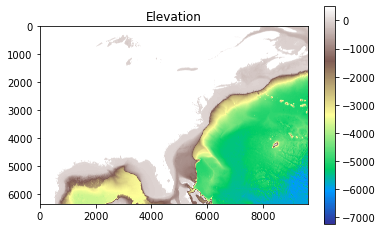

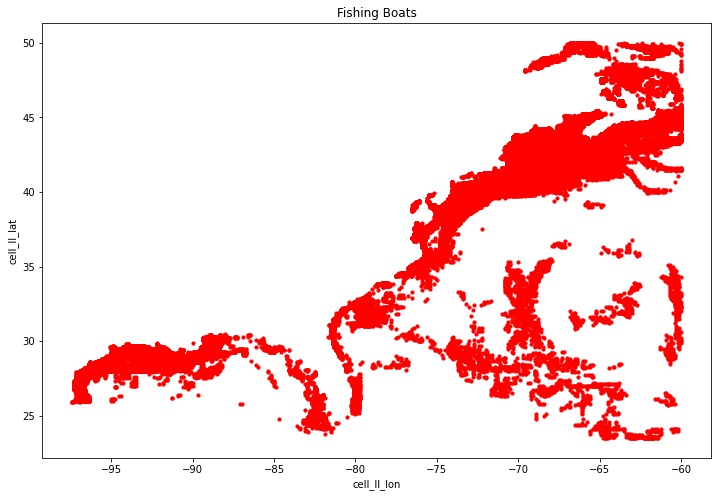

In [40]:
plot = plt.imshow(depth_df, cmap="terrain")
plt.title("Elevation")
plot.figure.colorbar(plot)
axes = vessels_df.plot.scatter(x='cell_ll_lon',y='cell_ll_lat',vmin=0,vmax=6,s=10,color="red",figsize=(12,8), alpha=1,sharex=False,title="Fishing Boats")

During processing, we noticed that there were was an interesting pattern of fishing boats farther off the coast. This data seems to have some kind of correlation with the seafloor elevation data. This interesting relationship prompts a new question, can fishing boat locations be used to predict bathymetric data?

## Conclusion

- Thanks to our analysis we figured out that there is not enough of a correlation between fishing boat locations and shipwrecks. Now we are exploring the connection between fishing boat connections and ocean floor elevations to see if there is a correlation there 

- Caveats: Had to revise our data and find more data due to a lot of missing data in our original dataset. Also, we had to find a way to merge the datasets together because they were not in the same format.

- Future work: We are going to look at the connection between fishing boat locations and ocean floor elevations to see if there is a correlation there. We may also revise our question(s) in the future depending on the data that has been gathered due to the huge amount of data that is unavailable.

- Open Questions: How often do people fish around shipwrecks? What reasons do they fish around shipwrecks? How far back does this trend go? How far back does the data go in the US in terms of shipwrecks? 